<a href="https://colab.research.google.com/github/Antika20/Expert_-Machine-Learning/blob/main/Prediksi_Regresi_pada_Biaya_Medis_Per_Individu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAMA : ANTIKA ORINDA

# XP : 12.779 

# Path : MLFE 02 SIB Batch 3 

Dataset yang digunakan : https://www.kaggle.com/datasets/mirichoi0218/insurance

## Import Module yang dibutuhkan 

In [1]:
# Untuk pengolahan data
from google.colab import files 
import numpy as np
import pandas as pd
from sklearn.utils import resample 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Instal Package Kaggle 

In [2]:
# install kaggle package
!pip install -q kaggle

## Upload JSON Profile Kaggle 

In [3]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antikaorinda","key":"4eff175b8f61192de087d150bebd4735"}'}

## Buat direktori dan ubah izin agar bisa memasukkan Json Kaggle 

In [4]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


## Download Dataset langsung dari Kaggle 

In [5]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 5.35MB/s]


# Ekstrak ZIP 

In [6]:
# Ekstrak ZIP 
from zipfile import ZipFile
file_name ="/content/insurance.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


## Memuat Dataset kedalam dataframe menggunakan Pandas

In [7]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Mengecek Informasi dari Dataset 

In [9]:
df.info() # mengecek informasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Mengecek stastitik Dataset 

In [10]:
df.describe() # deskripsi stastitik data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Mencari Mising Value 

In [11]:
df.isnull().sum() # Find Missing Values in list Dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#Total Number of Missing NA
df.isnull().sum().sum()

0

# Explorisasi Data / Visualisasi Data 

##Visualisasikan Outliers pada Fitur Numerik

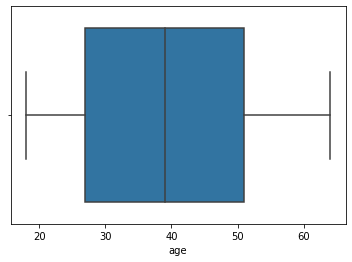

In [13]:
sns.boxplot(x=df['age']) # visualisasikan data age pada fitur numerik

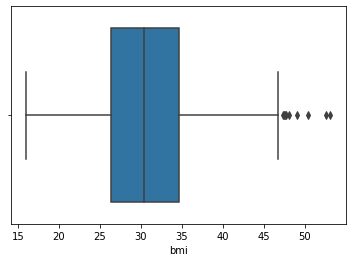

In [14]:
sns.boxplot(x=df['bmi']) # visualisasikan data bmi pada fitur numerik

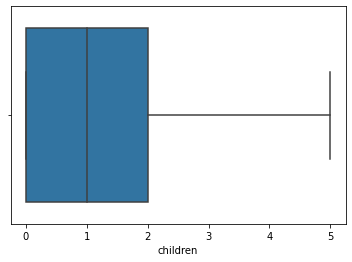

In [15]:
sns.boxplot(x=df['children']) # visualisasikan data children pada fitur numerik

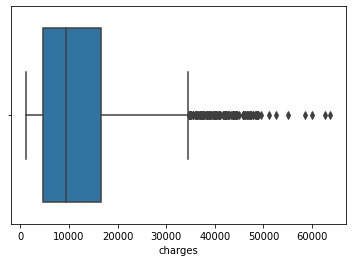

In [16]:
sns.boxplot(x=df['charges']) # visualisasikan data charges pada fitur numerik

##Menangani Outlier

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
insurance=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
insurance.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(1193, 7)

##Pembagian dataset menjadi 2 Fitur yaitu numerical dan kategori

In [18]:
numerical_features = ['age','bmi','children','charges'] 
categorical_features = ['sex','smoker','region']

## Grouping Visualisasi Fitur Kategori

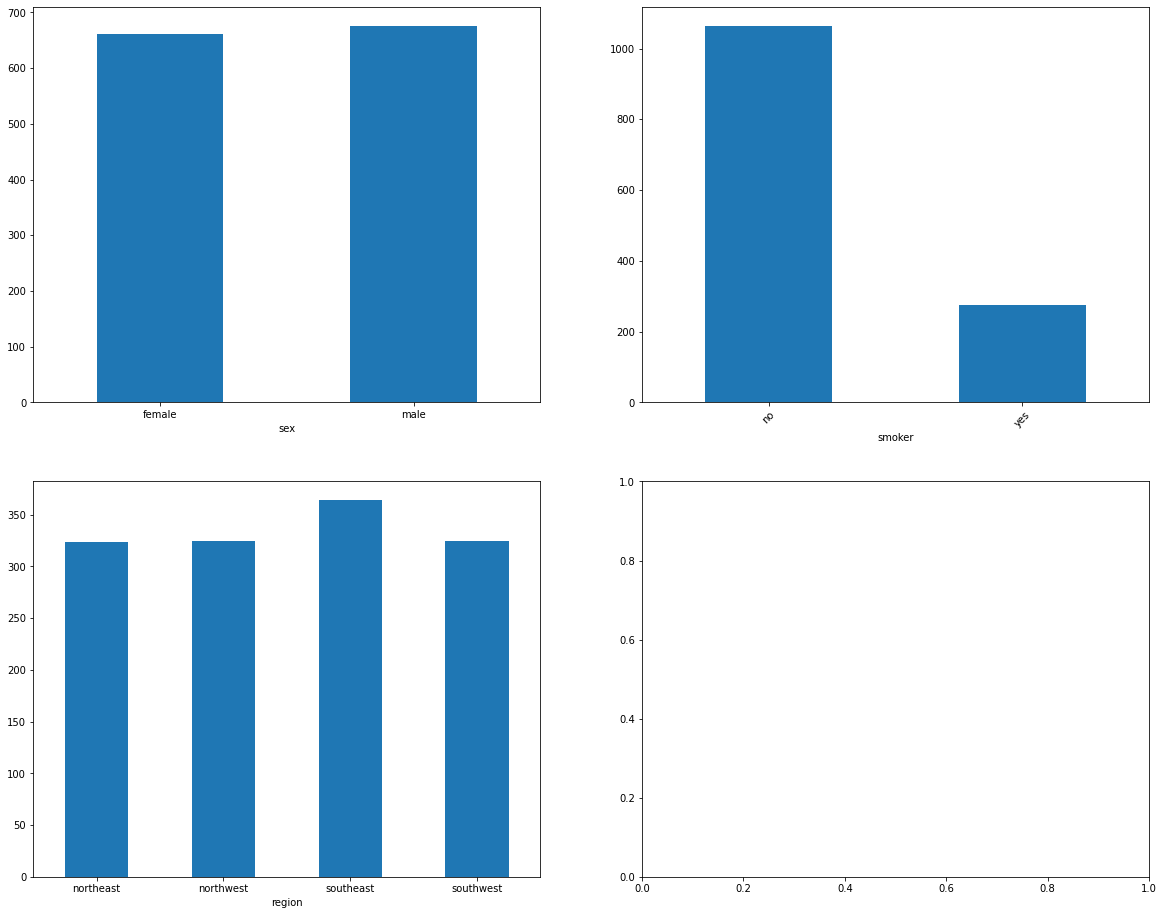

In [19]:
plt.subplots(2, 2, figsize=(20, 16))

for i, col in enumerate(categorical_features):
  plt.subplot(2, 2, i + 1)
  if col == 'smoker':
    df.groupby(col).size().plot(kind='bar', rot=45)
  else:
    df.groupby(col).size().plot(kind='bar', rot=0)

##Visualisasi Category Fitur

        jumlah sampel  persentase
male              676        50.5
female            662        49.5


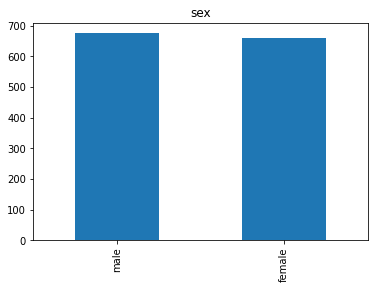

In [20]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no            1064        79.5
yes            274        20.5


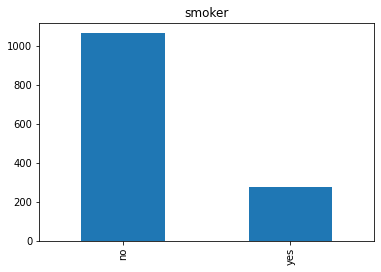

In [21]:
feature1 = categorical_features[1]
count1 = df[feature1].value_counts()
percent1 = 100*df[feature1].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count1, 'persentase':percent1.round(1)})
print(df2)
count1.plot(kind='bar', title=feature1);

           jumlah sampel  persentase
southeast            364        27.2
southwest            325        24.3
northwest            325        24.3
northeast            324        24.2


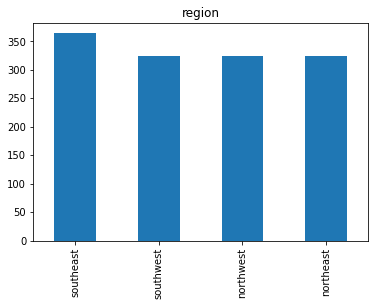

In [22]:
feature1 = categorical_features[2]
count1 = df[feature1].value_counts()
percent1 = 100*df[feature1].value_counts(normalize=True)
df3 = pd.DataFrame({'jumlah sampel':count1, 'persentase':percent1.round(1)})
print(df3)
count1.plot(kind='bar', title=feature1);

##Visualisasi Fitur Numerik

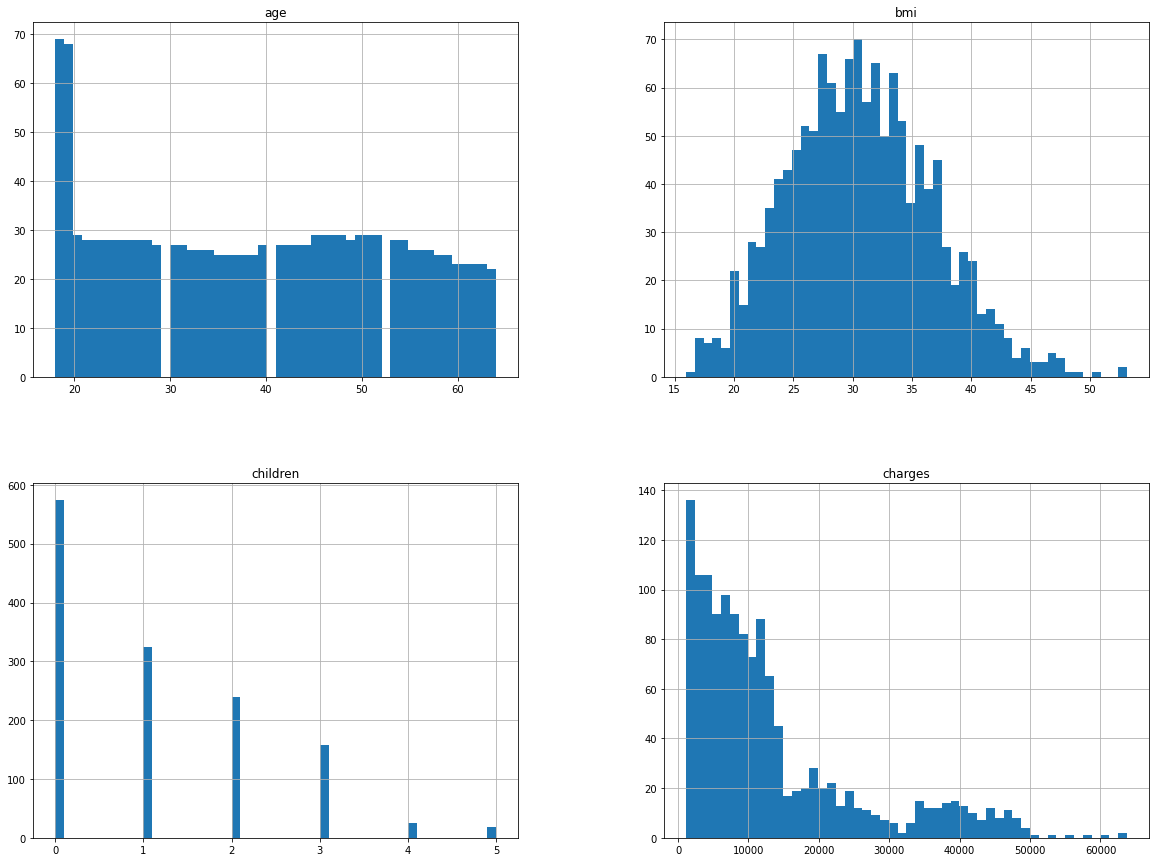

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##Exploratory Data Analysis - Multivariate Analysis-

**Categorical Features**

Pada tahap ini, kita akan mengecek rata-rata charges terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap charges.

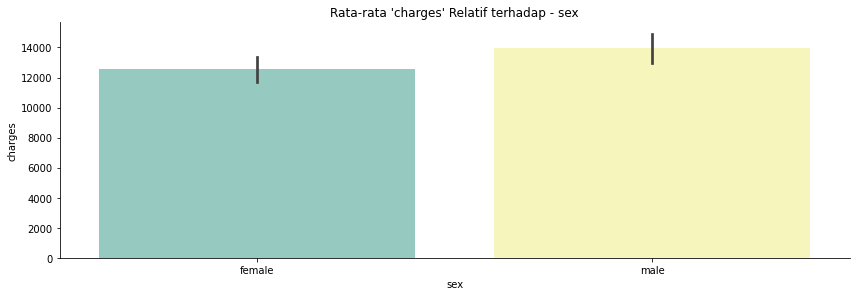

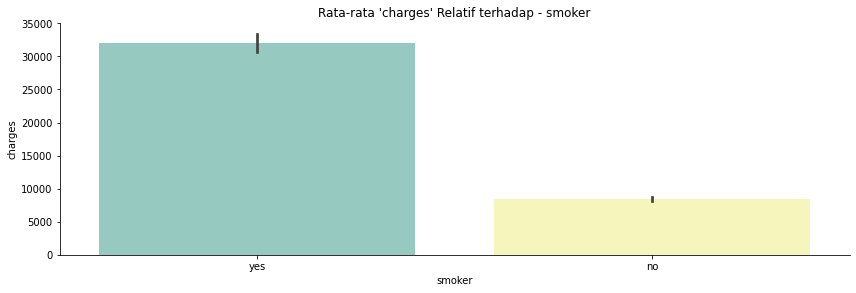

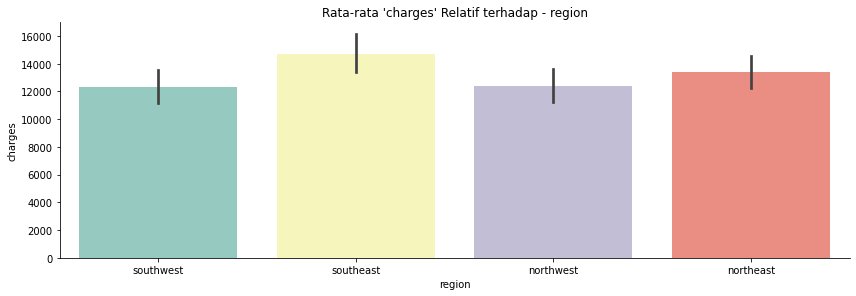

In [24]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

**Numerical Features**

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr(). Tidak perlu menunggu lama, mari kita langsung analisis datanya.

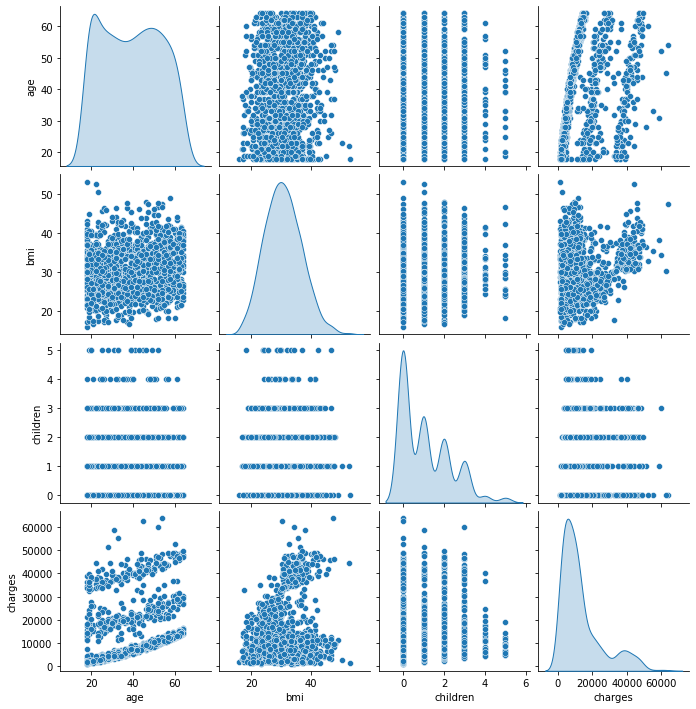

In [25]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

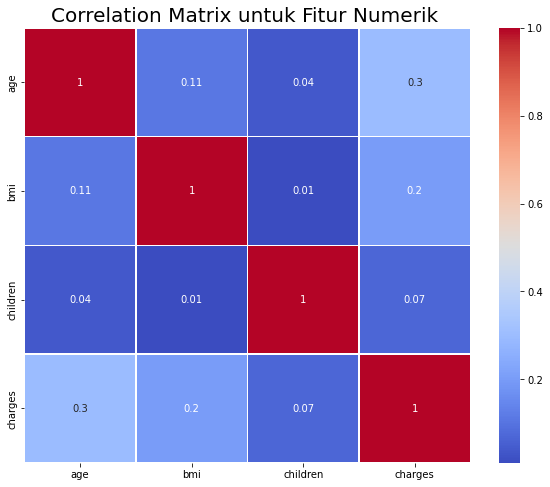

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2) # Fungsi Cor -> evaluasi skor korelasi 
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [27]:
df.drop(['bmi'], inplace=True, axis=1)
df.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


#Data Preparation 

##menangani Category Fitur dengan One Hot Encoding 

In [28]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df = pd.concat([df, pd.get_dummies(df['smoker'], prefix='smoker')],axis=1)
df= pd.concat([df, pd.get_dummies(df['region'], prefix='region')],axis=1)
df.drop(['sex','smoker','region'], axis=1, inplace=True)
df.head()

,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,1,0,0,0,1
1,18,1,1725.55230,0,1,1,0,0,0,1,0
2,28,3,4449.46200,0,1,1,0,0,0,1,0
3,33,0,21984.47061,0,1,1,0,0,1,0,0
4,32,0,3866.85520,0,1,1,0,0,1,0,0


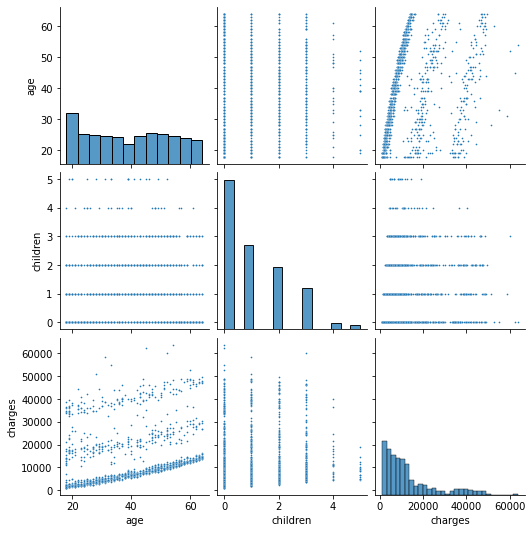

In [29]:
sns.pairplot(df[['age','children','charges']], plot_kws={"s":3});

In [30]:
df.head()

,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,1,0,0,0,1
1,18,1,1725.55230,0,1,1,0,0,0,1,0
2,28,3,4449.46200,0,1,1,0,0,0,1,0
3,33,0,21984.47061,0,1,1,0,0,1,0,0
4,32,0,3866.85520,0,1,1,0,0,1,0,0


##Teknik PCA dengan tujuan mengurangi reduksi dimensi saat modelling 

In [31]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(df[['age','children','charges']])
princ_comp = pca.transform(df[['age','children','charges']])

In [32]:
print(pca)

PCA(n_components=3, random_state=123)


In [33]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

In [34]:
print (df)

      age  children      charges  sex_female  sex_male  smoker_no  smoker_yes  \
0      19         0  16884.92400           1         0          0           1   
1      18         1   1725.55230           0         1          1           0   
2      28         3   4449.46200           0         1          1           0   
3      33         0  21984.47061           0         1          1           0   
4      32         0   3866.85520           0         1          1           0   
...   ...       ...          ...         ...       ...        ...         ...   
1333   50         3  10600.54830           0         1          1           0   
1334   18         0   2205.98080           1         0          1           0   
1335   18         0   1629.83350           1         0          1           0   
1336   21         0   2007.94500           1         0          1           0   
1337   61         0  29141.36030           1         0          0           1   

      region_northeast  reg

## Split dataset dengan ukuran 80:20 

In [35]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["charges"],axis =1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [36]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1338
Total # of sample in train dataset: 1070
Total # of sample in test dataset: 268


##Standarisasi 

In [37]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['age','children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()


,age,children
67,0.062072,-0.067366
736,-0.150575,-0.886479
310,0.770896,-0.886479
963,0.487366,1.570860
680,-1.284694,-0.067366


In [38]:
X_train[numerical_features].head()

,age,children
67,0.062072,-0.067366
736,-0.150575,-0.886479
310,0.770896,-0.886479
963,0.487366,1.570860
680,-1.284694,-0.067366


In [39]:
X_train[numerical_features].describe().round(4)

,age,children
count,1070.0000,1070.0000
mean,0.0000,-0.0000
std,1.0005,1.0005
min,-1.4973,-0.8865
25%,-0.9303,-0.8865
50%,-0.0088,-0.0674
75%,0.8418,0.7517
max,1.7632,3.2091


##Penyiapan dataframe untuk analisis hasil model 

In [40]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting','SVM'])

# Modelling dengan KNN 

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# Modelling dengan Random Forest 

In [42]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

# Modelling dengan Boosting 

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Modelling dengan SVR 

In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svm= SVR()                           
svm.fit(X_train, y_train)
models.loc['train_mse','svm'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

# Scalling Fitur Numerik 

In [45]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Persiapan dan Penghitungan Mean Squared Error masing-masing algoritma

In [46]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting','svm'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting,'svm':svm}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 # Panggil mse
mse

,train,test
KNN,38190666.934227,45165701.590825
RF,12361073.677352,50698016.090074
Boosting,41173600.411401,37804782.197369
svm,159381957.446801,170699957.447317


In [47]:
mse

,train,test
KNN,38190666.934227,45165701.590825
RF,12361073.677352,50698016.090074
Boosting,41173600.411401,37804782.197369
svm,159381957.446801,170699957.447317


# Visualiasi chart bar Hasil penghitungan  Mean Squared Error masing-masing algoritma

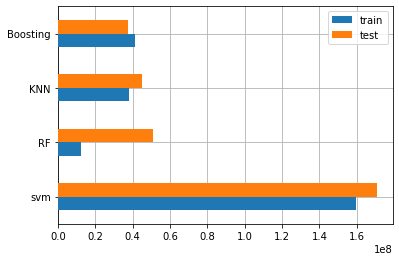

In [48]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Hasil Prediksi berdasarkan penghitungan  Mean Squared Error masing-masing algoritma

In [49]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_svm
650,9800.8882,9651.5,9755.4,12167.0,9312.6


In [50]:
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_svm
650,9800.8882,9651.5,9755.4,12167.0,9312.6
